# Data Exploration and Feature Engineering
___
The dataset is a sample taken from Reactor A's database, which is filled in by manual input. Let's first take a look into the columns, data types, and missing values. There are 2717 total entries.

Description for each feature:

- Approx. Layers Thick. (mm) - Total thickness of the semiconductor deposited
- Reactor Press (mbar) - Average pressure of production run
- TGV Position (%) - Openness of throttle gate valve during run (where 100% is fully open)
- dP Filter (mbar) - Differential Pressure across downstream filter used to clean up exhaust chemicals
- DOR Press (mbar) - Pressure of reactor lid lock. This value should be in vaccuum meaning the lid is fully sealed
- RF_U (%) - Voltage of reactor heating source
- RF_I (%) - Current of reactor heating source
- RF_Power (%) - Power of reactor heating source
- Ceiling N2/H2 Ratio - Mixture gas ratio. The gas through the reactor is used to maintain correct chamber temperature along the perimeter of the chamber
- Exh. 1 Temp (C) - Temperature of exhaust gasses through port 1
- Exh. 2 Temp (C) - Temperature of exhaust gasses through port 2
- Y-Tube Delta_Temp - Temperature differential between exhaust port 1 and 2
- Water In (C) - Temperature of cooling water plumbing for reactor (segment 1 of 4)
- Water Center (C) - Temperature of cooling water plumbing for reactor (segment  2 of 4)
- Water Coil (C) - Temperature of cooling water plumbing for reactor (segment  3 of 4)
- Water Bottom (C) - Temperature of cooling water plumbing for reactor (segment  4 of 4)
- Hydride 1 Consumed (g) - Amount hydride chemical #1 used during run
- Hydride 2 Consumed (g) - Amount hydride chemical #2 used during run
- MO 1 Consumed (g) - Amount metal organic chemical #1 used during run
- MO 2 Consumed (g) - Amount metal organic chemical #2 used during run
- MO 3 Consumed (g) - Amount metal organic chemical #3 used during run
- MO 4 Consumed (g) - Amount metal organic chemical #4 used during run
- Ground Truth Anomaly - The anomaly classifier (0 = no anomaly/1 = anomaly). It was added in order to perform the condition monitoring modeling. This feature was reviewed and determined by the engineer.


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import calplot
%matplotlib inline

from scipy.optimize import curve_fit

import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,QuantileTransformer,RobustScaler,Normalizer,MaxAbsScaler,MinMaxScaler,PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score


In [3]:
# Import data as pandas dataframe
df = pd.read_excel("300012_Logsheet.xlsx", sheet_name="RUN Data", header=1)

In [4]:
# Rename columns for better interpretibility
df.rename(
    columns={
        "Approx. Layers Thick. mm": "Approx. Layers Thick. (mm)",
        "Total Thick. Since HCL clean    mm":"Total Thick Since HCL clean (mm)",
        "Thick. Since Filter Cart Change mm":"Thick Since Filter Cart Change (mm)",
        "TGV Position (%)":"TGV Position (%)",
        "Reactor\nPress\nmbar": "Reactor Press (mbar)",
        "TGV\nPosition\n%": "TGV Position (%)",
        "Filter\ndP\nmbar": "dP Filter (mbar)",
        "DOR\nPress\nmbar":"DOR Press (mbar)",
        "Ch. #1 Moisture\nN2\n°C":"Ch.1 Moisture N2 (°C)",
        "Ch. #2 Moisture\nH2\n°C":"Ch.2 Moisture H2 (°C)",
        "Ch. #3 Moisture AsH3_1\n°C":"Ch.3 Moisture AsH3_1 (°C)",
        "Ch. #4 Moisture PH3_1\n°C":"Ch.4 Moisture PH3_1 (°C)",
        "TMIn_1 Inficon Concen.         Mole          %":"TMIn_1 Inficon Concen. (Mole%)",
        "TMIn_2 Inficon Concen.         Mole          %":"TMIn_2 Inficon Concen. (Mole%)",
        "TMIn_4 Inficon Concen.         Mole          %":"TMIn_4 Inficon Concen. (Mole%)",
        "CH. #1 Wafer\nSi          Temp.\n°C":"Ch.1 Wafer_Si (°C)",
        "Ch. #3 Reactor\nInGaAs Temp.\n°C":"Ch.3 Wafer_InGaAs Temp (°C)",
        "EpiTT Wafer #1 Center Temp.\n°C":"EpiTT Wafer #1 Center Temp (°C)",
        "RF\nU\n%":"RF_U (%)",
        "RF\nI\n%":"RF_I (%)",
        "RF\nPower\n%":"RF_Power (%)",
        "Ceiling\nTemp.\n°C":"Ceiling Temp (°C)",
        "Ceiling Source\nH2\nsccm":"Ceiling H2 Source (sccm)",
        "Ceiling\nN2\nsccm":"Ceiling N2 Source (sccm)",
        "Ceiling\nN2/H2\n":"Ceiling N2/H2 Ratio",
        "Exh. 1\nTemp.\n°C":"Exh.1 Temp (°C)",
        "Exh. 2\nTemp.\n°C":"Exh.2 Temp (°C)",
        "Y - Tube Delta\nTemp.\n°C":"Y-Tube Delta_Temp (°C)",
        "Water In\n°C":"Water In (°C)",
        "Water\nCenter\n°C":"Water Center (°C)",
        "Water\nCoil\n°C":"Water Coil (°C)",
        "Water\nBottom\n°C":"Water Bottom (°C)",
        "Filter Cart Chiller Temp.\n°C":"Filter Cart Chiller Temp. (°C)",
        "RF Chiller Temp. °C":"RF Chiller Temp. (°C)",

    },
    inplace=True,
)

In [5]:
# # plot
# df = df.set_index(['Date'])
# col = 'Ground Truth Anomaly'
# calplot.calplot(df['2020-06-16':'2020-07-29'][col], how='max')



#df = df.set_index(['Date'])
df = df.set_index(['Run#'])
#df["Ground Truth Anomaly"]=df["Ground Truth Anomaly"].astype(bool)
df.head()

,Date,Approx. Layers Thick. (mm),Total Thick Since HCL clean (mm),Thick Since Filter Cart Change (mm),Growth Type,Project Type,Scrubber Column,Reactor Press (mbar),TGV Position (%),dP Filter (mbar),...,TMIn_4 Consumed (g),Total TMIn Consumed (g),DMZn_1 Consumed (g),DMZn_ 2 Consumed (g),Total DMZn Consumed (g),Total TMAl Consumed (g),HCl_1 Consumed (g),Filter Cart Chiller Temp. (°C),RF Chiller Temp. (°C),Ground Truth Anomaly
Run#,,,,,,,,,,,,,,,,,,,,,
NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,°C,NaN
12-7394,2019-07-01,0.68,NaN,NaN,InP-GR,R&D,B,99.6,32.3,3.95,...,0.506,0.639,**,**,0.000,0.0,**,-4.1,20,0.0
12-7395,2019-07-01,0.68,NaN,NaN,InP-GR,R&D,B,99.6,32.1,4.04,...,0.505,0.635,**,**,0.000,0.0,**,-4.8,21,0.0
12-7396,2019-07-01,0.77,NaN,NaN,15Epi2,R&D,B,99.5,33.5,4.17,...,0.252,0.680,0.037,**,0.037,0.0,**,-4.6,20,0.0
12-7397,2019-07-02,0.77,NaN,NaN,15Epi2,R&D,B,99.5,34,4.24,...,0.253,0.686,0.037,**,0.037,0.0,**,-4.5,20,0.0


In [6]:
#### This segment of code is a rough draft for feature engineering
df['Total Hydride Consumed (g)'] = df[['Total AsH3 Consumed (g)','Total PH3 Consumed (g)']].sum(axis=1)
df['Total MO Consumed (g)'] = df[['Total TMGa Consumed (g)','Total TMIn Consumed (g)','Total DMZn Consumed (g)','Total TMAl Consumed (g)']].sum(axis=1)

# Drop the following since "Total Consumed" accounts for separate contributions and instantaneous concentrations won't tell much in terms of TGV failure
df.drop(
    [
        "TMIn_1 Inficon Concen. (Mole%)",
        "TMIn_2 Inficon Concen. (Mole%)",
        "TMIn_4 Inficon Concen. (Mole%)",
        "AsH3_1 Consumed (g)",
        "AsH3_2 Consumed (g)",
        "PH3_1 Consumed (g)",
        "PH3_2 Consumed (g)",
        "Si2H6_1 Consumed (liters)",
        "TMGa_1 Consumed (g)",
        "TMGa_2 Consumed (g)",
        "TMIn_1 Consumed (g)",
        "TMIn_2 Consumed (g)",
        "TMIn_4 Consumed (g)",
        "DMZn_1 Consumed (g)",
        "Total AsH3 Consumed (g)",
        "Total PH3 Consumed (g)",
        "Total TMGa Consumed (g)",
        "Total TMIn Consumed (g)",
        "Total DMZn Consumed (g)",
        "Total TMAl Consumed (g)",
        "Approx. Layers Thick. (mm)",
        "Ceiling Temp (°C)",
        "Ch.1 Moisture N2 (°C)",
        "DMZn_ 2 Consumed (g)",
        "HCl_1 Consumed (g)",
        "Ch.2 Moisture H2 (°C)",
        "Ch.3 Moisture AsH3_1 (°C)",
        "Ch.4 Moisture PH3_1 (°C)",
        "Ch.1 Wafer_Si (°C)",
        "Ch.3 Wafer_InGaAs Temp (°C)",
        "EpiTT Wafer #1 Center Temp (°C)",
        "R2R",
        "Ceiling H2 Source (sccm)",
        "Ceiling N2 Source (sccm)",
        "Exh.1 Temp (°C)",
        "Exh.2 Temp (°C)",
        "Thick Since Filter Cart Change (mm)",
        "Scrubber Column",
        "RF Chiller Temp. (°C)",
        "Filter Cart Chiller Temp. (°C)",
        "Total Thick Since HCL clean (mm)",
        "RF_U (%)",
        "RF_I (%)"
    ],
    axis=1,
    inplace=True,
)

In [7]:
# List all columns that are numeric and all columns that are categories
cat_cols = [
    "Date",
    "Growth Type",
    "Project Type",
    "Scrubber Column",
    "Ground Truth Anomaly"
]
num_cols = []
for col in df.columns:
    if col not in cat_cols:
        num_cols.append(col)

# to_numeric to covert all the columns to float and change all "**" and strings to Nan
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
# Cut off rows at the last Date/Run# published
df.drop(index=df.iloc[2717:, :].index.tolist(), inplace=True)

In [8]:
# Remove Outliers using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_cols] < (Q1 - 9 * IQR)) |(df[num_cols] > (Q3 + 9 * IQR))).any(axis=1)]

Reactor Press (mbar)
Skew : 0.03


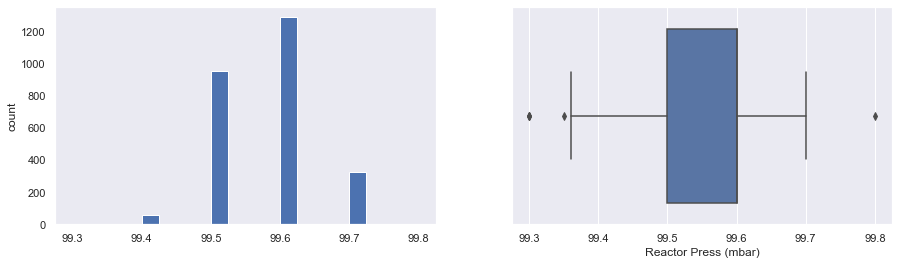

TGV Position (%)
Skew : -0.09


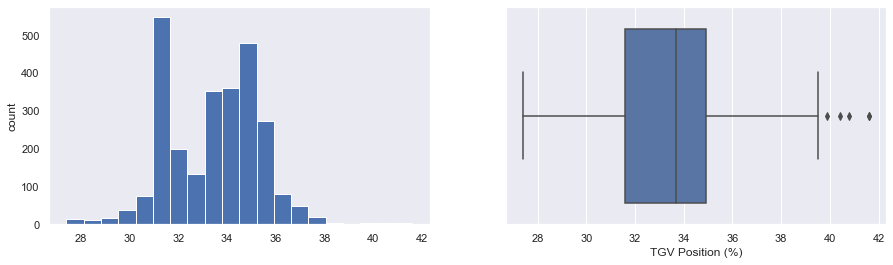

dP Filter (mbar)
Skew : 2.41


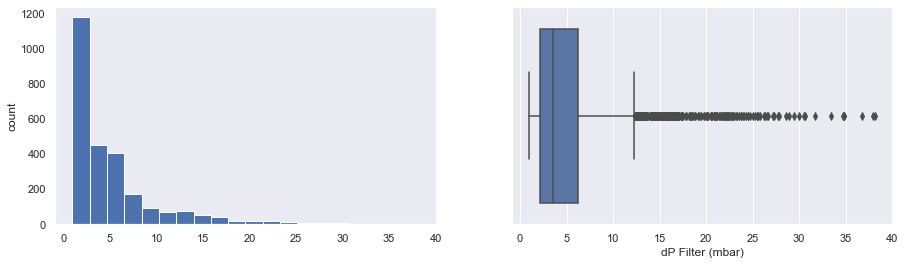

DOR Press (mbar)
Skew : -0.08


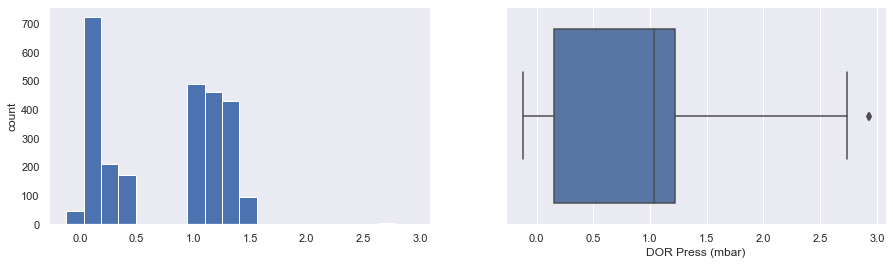

RF_Power (%)
Skew : -2.49


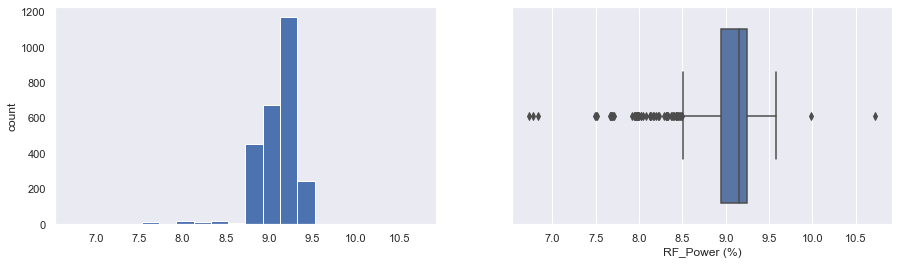

Ceiling N2/H2 Ratio
Skew : 1.95


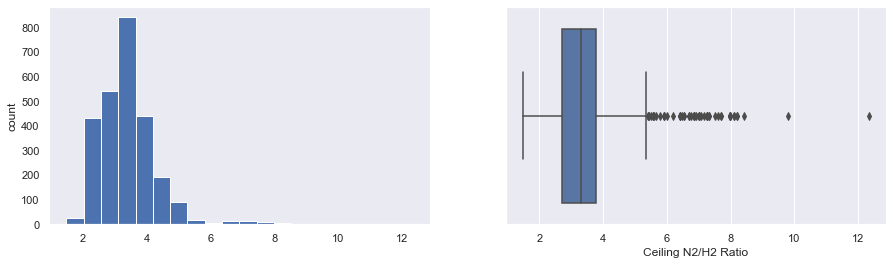

Y-Tube Delta_Temp (°C)
Skew : -0.5


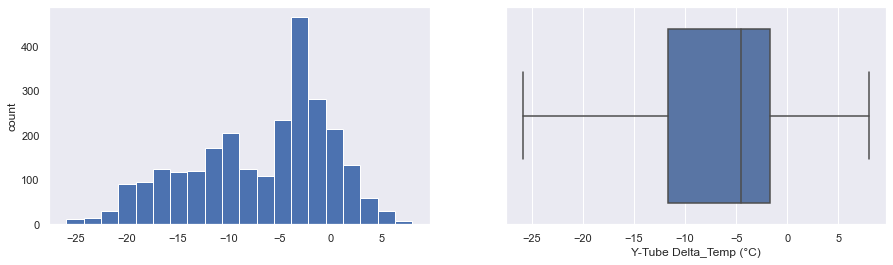

Water In (°C)
Skew : -0.21


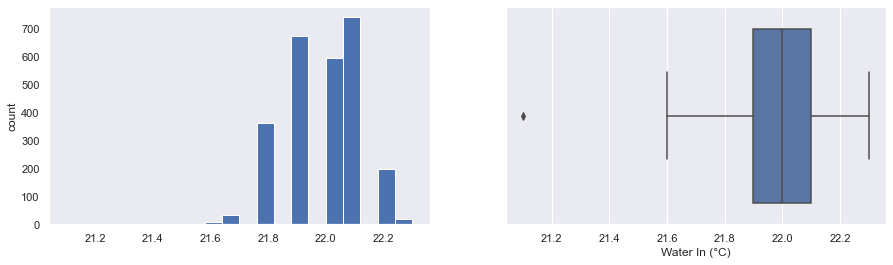

Water Center (°C)
Skew : -0.08


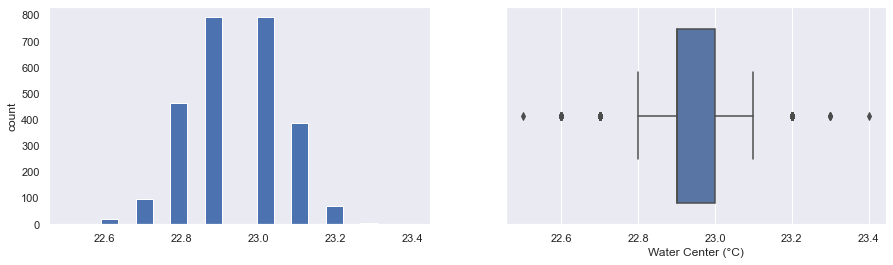

Water Coil (°C)
Skew : -0.41


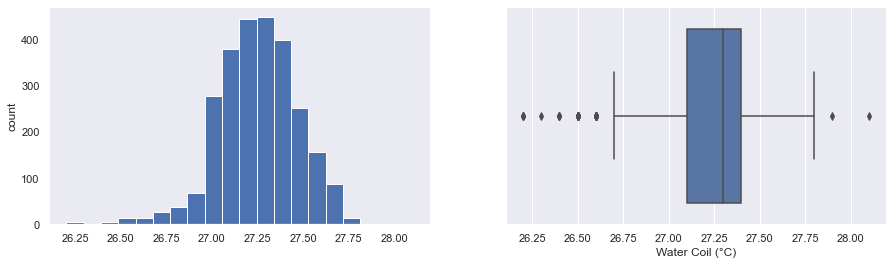

Water Bottom (°C)
Skew : -0.44


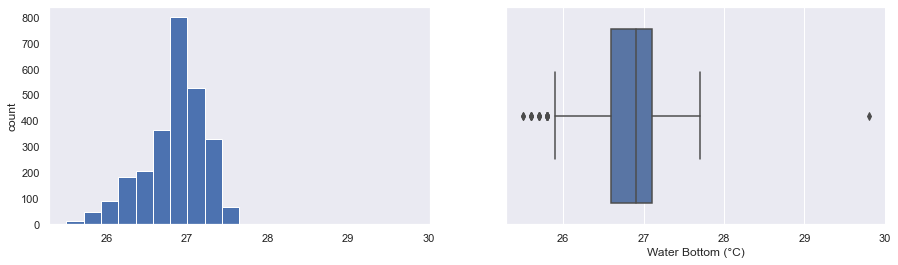

Total Hydride Consumed (g)
Skew : 0.23


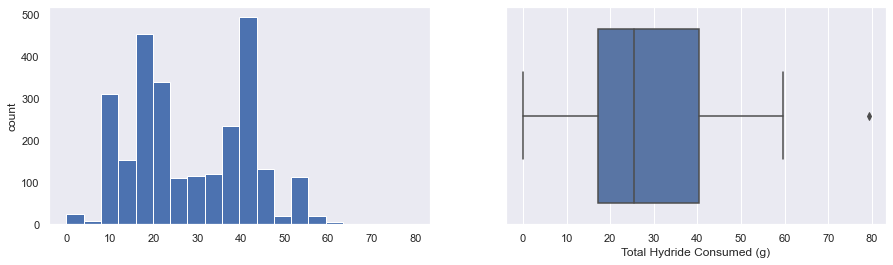

Total MO Consumed (g)
Skew : 1.22


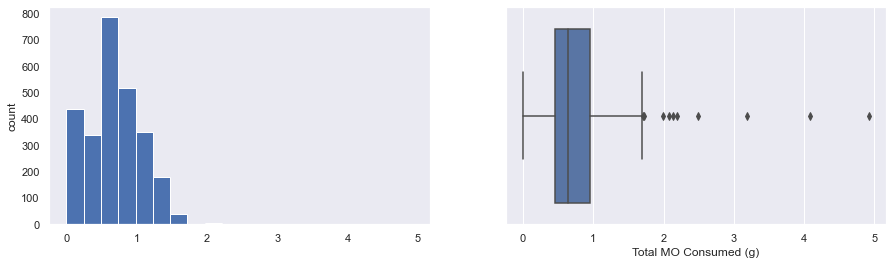

In [9]:
# # Histograms for each feature
for col in num_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=20, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [10]:
# calculate the percentage of missing data per feature
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

Date                          0.000000
Growth Type                   0.000000
Project Type                  0.000000
Reactor Press (mbar)          0.753296
TGV Position (%)              0.000000
dP Filter (mbar)              0.753296
DOR Press (mbar)              0.753296
RF_Power (%)                  1.054614
Ceiling N2/H2 Ratio           1.016949
Y-Tube Delta_Temp (°C)        0.790960
Water In (°C)                 0.866290
Water Center (°C)             0.941620
Water Coil (°C)               0.903955
Water Bottom (°C)             0.903955
Ground Truth Anomaly          0.000000
Total Hydride Consumed (g)    0.000000
Total MO Consumed (g)         0.000000
dtype: float64


In [11]:
# Feature Engineering, Creating Ceof A and B columns
hyd_temp = np.array([])
mo_temp = np.array([])
detect = np.array([])
hyd_cum = np.array([])
mo_cum = np.array([])

for i in range(len(df)):
    hyd_temp = np.append(hyd_temp, df["Total Hydride Consumed (g)"][i])
    mo_temp = np.append(mo_temp, df["Total MO Consumed (g)"][i])
    detect = np.append(detect, df["Ground Truth Anomaly"][i])


    if detect[-1] == 1.0:
        hyd_cum = np.append(hyd_cum, hyd_temp.sum())
        mo_cum = np.append(mo_cum, mo_temp.sum())
        hyd_temp = np.array([])
        mo_temp = np.array([])

    else:
        hyd_cum = np.append(hyd_cum, hyd_temp.sum())
        mo_cum = np.append(mo_cum, mo_temp.sum())

df['Cummulative Sum Hydride Consumed (g)'] = hyd_cum
df['Cummulative Sum MO Consumed (g)'] = mo_cum

df.drop(
    [
        "Total Hydride Consumed (g)",
        "Total MO Consumed (g)"
    ],
    axis=1,
    inplace=True,
)
df.to_csv("df_checker.csv")

In [12]:
# Feature Engineering, Creating Ceof A and B columns
y_temp = np.array([])
detect = np.array([])
Coef_A = np.array([])
Coef_B = np.array([])
x_temp = np.array([])
#run_check = np.array([])

def ff(t, a, b):
    #return a*np.exp(b*t)
    return a*t+b

for i in range(len(df)):
    y_temp = np.append(y_temp, df["TGV Position (%)"][i])
    detect = np.append(detect, df["Ground Truth Anomaly"][i])
    #run_check = np.append(run_check, df["Run#"][i]) #Use as a code checker
    x_temp = np.array(range(len(y_temp)))

    if y_temp.size == 1:
        Coef_A = np.append(Coef_A, 0)
        Coef_B = np.append(Coef_B, df["TGV Position (%)"][i])
    else:
        pfit, perr = curve_fit(ff,  x_temp,  y_temp, p0=(0.1, 32))
        Coef_A = np.append(Coef_A, pfit[0])
        Coef_B = np.append(Coef_B, pfit[1])
        if detect[-1] == 1.0:
            y_temp = np.array([])

df["Coef_A"] = Coef_A
df["Coef_B"] = Coef_B
df[["Ground Truth Anomaly","Coef_A","Coef_B"]].to_csv("Exported_Coef.csv")

C:\Users\Kyle\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [13]:
# Feature Engineering, creating column for # of runs since last 
detect = np.array([])
#run_check = np.array([])
past_run = np.array([])

for i in range(len(df)):
    detect = np.append(detect, df["Ground Truth Anomaly"][i])
    #run_check = np.append(run_check, df["Run#"][i]) #Use as a code checker

    if detect[-1] == 1.0:
        past_run = np.append(past_run, detect.size)
        detect = np.array([])
    else:
        past_run = np.append(past_run, detect.size)
df["# of runs since last TGV Maint."] = past_run
#df.to_csv("TGV_main_check.csv")

In [14]:
# List all columns that are numeric and all columns that are categories
cat_cols = [
    "Date",
    #"Run#",
    "Growth Type",
    "Project Type",
    "Scrubber Column",
    "Ground Truth Anomaly"
]
num_cols = []
for col in df.columns:
    if col in cat_cols:
        pass
    else:
        num_cols.append(col)

num_df = df[num_cols]

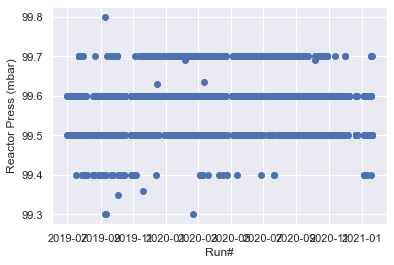

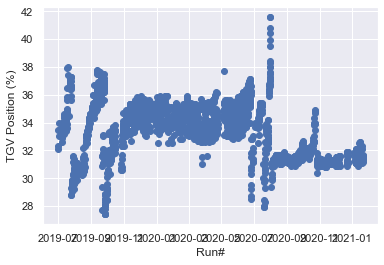

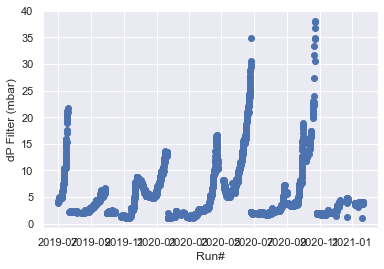

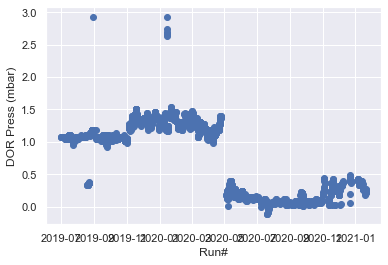

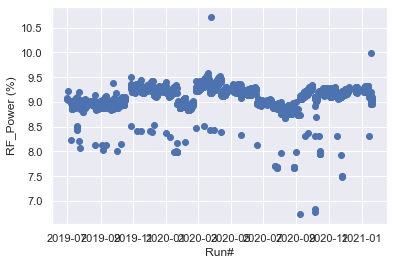

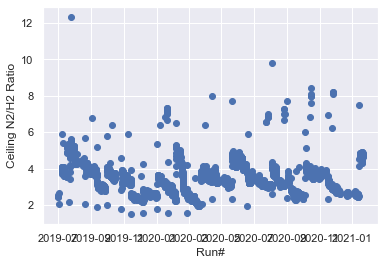

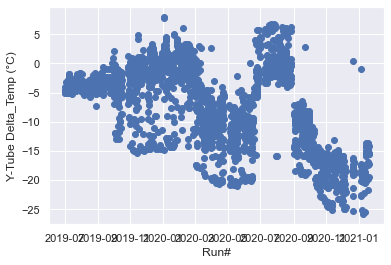

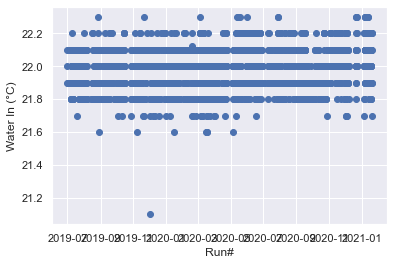

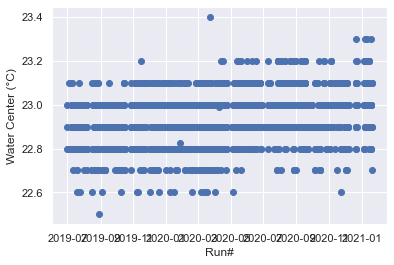

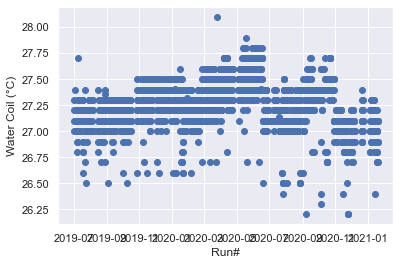

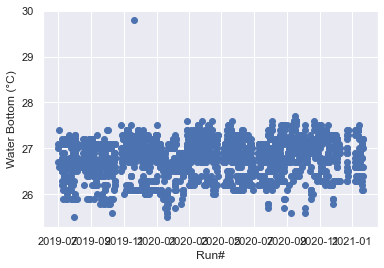

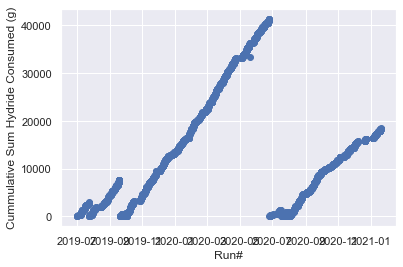

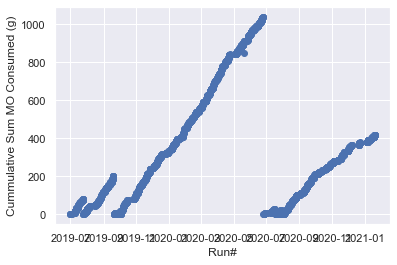

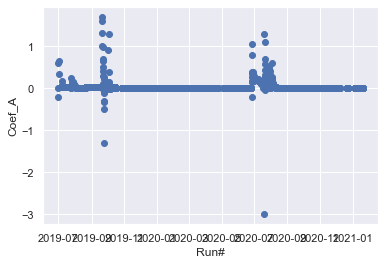

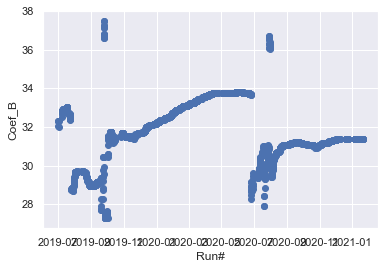

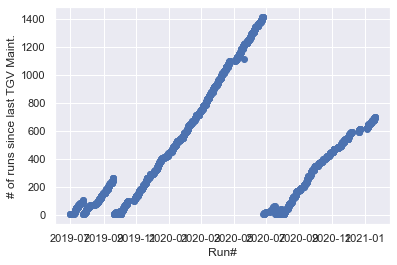

In [15]:
# Scatterplots for each feature
for col in num_cols:
    plt.scatter(df['Date'], df[col])
    plt.xlabel('Run#')
    plt.ylabel(col)
    plt.show()

In [16]:
# col = [
#     #"TGV Position (%)",
#     "Coef_A"
# ]
# y = df[col].loc["12-9300":]
# x = range(len(y))

# plt.figure(figsize=(16,10))
# plt.plot(x,y, alpha=0.5, linestyle="-", color = "Blue")
# plt.ylabel("Coefficient A Value")
# plt.xlabel("nth Run")
# plt.title("Coefficient A Value per Run")
# # plt.axvline(x=2370,color='r')
# # plt.axvline(x=1950,color='r')
# # plt.axvline(x=370,color='r')
# # plt.axvline(x=95,color='r')
# plt.axvline(x=25,color='r')

In [17]:
# col = [
#     #"TGV Position (%)",
#     "Coef_A"
# ]
# y = df[col].loc["12-9300":]
# x = range(len(y))

# plt.figure(figsize=(16,10))
# plt.plot(x,y, alpha=0.5, linestyle="-", color = "Blue")
# plt.ylabel("Coefficient A Value")
# plt.xlabel("nth Run")
# plt.title("Coefficient A Value per Run")
# # plt.axvline(x=2370,color='r')
# # plt.axvline(x=1950,color='r')
# # plt.axvline(x=370,color='r')
# # plt.axvline(x=95,color='r')
# plt.axvline(x=25,color='r')

In [18]:
# plt.figure(figsize=(16,10))
# plt.title("TGV Failures in 2019-2020")
# plt.scatter(df["Date"], df["# of runs since last TGV Maint."])
# plt.xlabel('Date')
# plt.ylabel(col)
# #plt.plot_date(x = '2012-07', y = 0)
# plt.axvline(pd.Timestamp('2020-06-28'),color='r')
# plt.axvline(pd.Timestamp('2019-09-20'),color='r')
# plt.axvline(pd.Timestamp('2019-07-25'),color='r')
# plt.show()